<a href="https://colab.research.google.com/github/aarsanjani/meansquares/blob/master/version2/feature_engineering/CA_Visualization_countylevel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


#Load data

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler as ss
import itertools
from scipy import linalg
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
CA_combined_data = pd.read_csv('/content/drive/Shared drives/CMPE 295- Master Project/projectdata-2021/CA_alldatasets_Feb05.csv',low_memory=False)
CA_combined_data.head()

,Date,Province_State,FIPS,New cases,County Name,population,mask_rule_severity,m50,m50_index,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,PopDensity
0,2020-03-01,California,6001,0,Alameda County,1671329,0.0,3.684,58,6.0,9.0,15.0,1.0,4.0,0.0,860.757075
1,2020-03-02,California,6001,0,Alameda County,1671329,0.0,6.182,98,4.0,7.0,7.0,-1.0,3.0,0.0,860.757075
2,2020-03-03,California,6001,1,Alameda County,1671329,0.0,6.271,100,5.0,12.0,41.0,0.0,1.0,-1.0,860.757075
3,2020-03-04,California,6001,0,Alameda County,1671329,0.0,6.209,99,1.0,6.0,23.0,-3.0,1.0,0.0,860.757075
4,2020-03-05,California,6001,0,Alameda County,1671329,0.0,6.654,106,1.0,6.0,12.0,-5.0,-1.0,1.0,860.757075


In [ ]:
CA_combined_data['New cases/100k'] = CA_combined_data['New cases'] * 100000 / CA_combined_data['population']
CA_combined_data.head()

,Date,Province_State,FIPS,New cases,County Name,population,mask_rule_severity,m50,m50_index,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,PopDensity,New cases/100k
0,2020-03-01,California,6001,0,Alameda County,1671329,0.0,3.684,58,6.0,9.0,15.0,1.0,4.0,0.0,860.757075,0.000000
1,2020-03-02,California,6001,0,Alameda County,1671329,0.0,6.182,98,4.0,7.0,7.0,-1.0,3.0,0.0,860.757075,0.000000
2,2020-03-03,California,6001,1,Alameda County,1671329,0.0,6.271,100,5.0,12.0,41.0,0.0,1.0,-1.0,860.757075,0.059833
3,2020-03-04,California,6001,0,Alameda County,1671329,0.0,6.209,99,1.0,6.0,23.0,-3.0,1.0,0.0,860.757075,0.000000
4,2020-03-05,California,6001,0,Alameda County,1671329,0.0,6.654,106,1.0,6.0,12.0,-5.0,-1.0,1.0,860.757075,0.000000


In [ ]:
CA_combined_data['Area occupied/100k'] = 100000 / CA_combined_data['PopDensity']
CA_combined_data.head()

,Date,Province_State,FIPS,New cases,County Name,population,mask_rule_severity,m50,m50_index,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,PopDensity,New cases/100k,Area occupied/100k
0,2020-03-01,California,6001,0,Alameda County,1671329,0.0,3.684,58,6.0,9.0,15.0,1.0,4.0,0.0,860.757075,0.000000,116.176797
1,2020-03-02,California,6001,0,Alameda County,1671329,0.0,6.182,98,4.0,7.0,7.0,-1.0,3.0,0.0,860.757075,0.000000,116.176797
2,2020-03-03,California,6001,1,Alameda County,1671329,0.0,6.271,100,5.0,12.0,41.0,0.0,1.0,-1.0,860.757075,0.059833,116.176797
3,2020-03-04,California,6001,0,Alameda County,1671329,0.0,6.209,99,1.0,6.0,23.0,-3.0,1.0,0.0,860.757075,0.000000,116.176797
4,2020-03-05,California,6001,0,Alameda County,1671329,0.0,6.654,106,1.0,6.0,12.0,-5.0,-1.0,1.0,860.757075,0.000000,116.176797


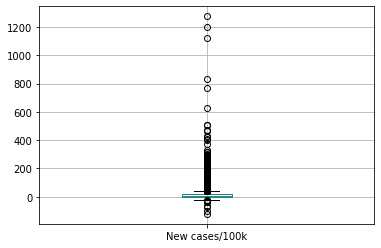

In [ ]:
boxplot = CA_combined_data.boxplot(column=['New cases/100k'],rot=0, fontsize=10)



In [ ]:
CA_combined_data['New cases/100k'].describe()

count    15821.000000
mean        15.919596
std         37.073322
min       -121.957980
25%          0.000000
50%          4.356824
75%         15.994573
max       1275.635365
Name: New cases/100k, dtype: float64

# Filtering counties with high number of cases

In [ ]:
df_high_cases = CA_combined_data[CA_combined_data['New cases/100k'] >= 100]
print(df_high_cases.shape)
df_high_cases.head()

(425, 18)


,Date,Province_State,FIPS,New cases,County Name,population,mask_rule_severity,m50,m50_index,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,PopDensity,New cases/100k,Area occupied/100k
547,2020-12-01,California,6005,48,Amador County,39752,10.0,6.417,47,2.0,-6.0,NaN,NaN,-21.0,8.0,24.565345,120.748642,4070.77527
549,2020-12-03,California,6005,74,Amador County,39752,10.0,5.306,39,-7.0,-5.0,NaN,NaN,-23.0,8.0,24.565345,186.154156,4070.77527
550,2020-12-04,California,6005,92,Amador County,39752,10.0,6.378,47,-9.0,-3.0,NaN,NaN,-22.0,8.0,24.565345,231.434896,4070.77527
551,2020-12-05,California,6005,85,Amador County,39752,10.0,2.337,17,-5.0,0.0,NaN,NaN,-9.0,NaN,24.565345,213.825719,4070.77527
552,2020-12-06,California,6005,74,Amador County,39752,10.0,1.393,10,-6.0,-7.0,NaN,NaN,-12.0,NaN,24.565345,186.154156,4070.77527


 # Filtering counties with less number of cases

In [ ]:
df_low_cases = CA_combined_data[CA_combined_data['New cases/100k'] < 100]
print(df_low_cases.shape)
df_low_cases.head()

(15396, 18)


,Date,Province_State,FIPS,New cases,County Name,population,mask_rule_severity,m50,m50_index,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,PopDensity,New cases/100k,Area occupied/100k
0,2020-03-01,California,6001,0,Alameda County,1671329,0.0,3.684,58,6.0,9.0,15.0,1.0,4.0,0.0,860.757075,0.000000,116.176797
1,2020-03-02,California,6001,0,Alameda County,1671329,0.0,6.182,98,4.0,7.0,7.0,-1.0,3.0,0.0,860.757075,0.000000,116.176797
2,2020-03-03,California,6001,1,Alameda County,1671329,0.0,6.271,100,5.0,12.0,41.0,0.0,1.0,-1.0,860.757075,0.059833,116.176797
3,2020-03-04,California,6001,0,Alameda County,1671329,0.0,6.209,99,1.0,6.0,23.0,-3.0,1.0,0.0,860.757075,0.000000,116.176797
4,2020-03-05,California,6001,0,Alameda County,1671329,0.0,6.654,106,1.0,6.0,12.0,-5.0,-1.0,1.0,860.757075,0.000000,116.176797


## County names

In [ ]:
print(df_high_cases.shape)
print(len(df_high_cases['County Name'].unique()))
print('min date: ',df_high_cases['Date'].min(),'maximum date: ',df_high_cases['Date'].max())
df_high_cases['County Name'].unique()

(425, 18)
47
min date:  2020-05-09 maximum date:  2021-01-05


array(['Amador County', 'Calaveras County', 'Colusa County',
       'Del Norte County', 'El Dorado County', 'Fresno County',
       'Glenn County', 'Imperial County', 'Inyo County', 'Kern County',
       'Kings County', 'Lake County', 'Lassen County',
       'Los Angeles County', 'Madera County', 'Marin County',
       'Mariposa County', 'Mendocino County', 'Merced County',
       'Mono County', 'Monterey County', 'Napa County', 'Orange County',
       'Placer County', 'Plumas County', 'Riverside County',
       'Sacramento County', 'San Benito County', 'San Bernardino County',
       'San Diego County', 'San Joaquin County', 'San Luis Obispo County',
       'San Mateo County', 'Santa Barbara County', 'Santa Clara County',
       'Santa Cruz County', 'Shasta County', 'Siskiyou County',
       'Solano County', 'Sonoma County', 'Stanislaus County',
       'Sutter County', 'Tehama County', 'Tulare County',
       'Tuolumne County', 'Ventura County', 'Yuba County'], dtype=object)

## Checking low cases data

In [ ]:
print(df_low_cases.shape)
print(len(df_low_cases['County Name'].unique()))
print('min date: ',df_low_cases['Date'].min(),'maximum date: ',df_low_cases['Date'].max())
df_low_cases['County Name'].unique()

(15396, 18)
54
min date:  2020-03-01 maximum date:  2021-01-05


array(['Alameda County', 'Amador County', 'Butte County',
       'Calaveras County', 'Colusa County', 'Contra Costa County',
       'Del Norte County', 'El Dorado County', 'Fresno County',
       'Glenn County', 'Humboldt County', 'Imperial County',
       'Inyo County', 'Kern County', 'Kings County', 'Lake County',
       'Lassen County', 'Los Angeles County', 'Madera County',
       'Marin County', 'Mariposa County', 'Mendocino County',
       'Merced County', 'Mono County', 'Monterey County', 'Napa County',
       'Nevada County', 'Orange County', 'Placer County', 'Plumas County',
       'Riverside County', 'Sacramento County', 'San Benito County',
       'San Bernardino County', 'San Diego County',
       'San Francisco County', 'San Joaquin County',
       'San Luis Obispo County', 'San Mateo County',
       'Santa Barbara County', 'Santa Clara County', 'Santa Cruz County',
       'Shasta County', 'Siskiyou County', 'Solano County',
       'Sonoma County', 'Stanislaus County', 'Su

# Filtering for date range from August to December

In [ ]:
df_high_cases_secondwave = df_high_cases[(df_high_cases['Date'] >= '2020-08-01') & (df_high_cases['Date'] <= '2020-12-31')]
print(df_high_cases_secondwave.shape)
print(len(df_high_cases_secondwave['County Name'].unique()))
print('min date: ',df_high_cases_secondwave['Date'].min(),'maximum date: ',df_high_cases_secondwave['Date'].max())
df_high_cases_secondwave['County Name'].unique()

(313, 18)
42
min date:  2020-08-01 maximum date:  2020-12-31


array(['Amador County', 'Calaveras County', 'Colusa County',
       'Del Norte County', 'El Dorado County', 'Fresno County',
       'Glenn County', 'Imperial County', 'Inyo County', 'Kern County',
       'Kings County', 'Lake County', 'Lassen County',
       'Los Angeles County', 'Madera County', 'Mariposa County',
       'Mendocino County', 'Merced County', 'Mono County',
       'Monterey County', 'Napa County', 'Orange County', 'Plumas County',
       'Riverside County', 'Sacramento County', 'San Benito County',
       'San Bernardino County', 'San Diego County', 'San Joaquin County',
       'San Mateo County', 'Santa Clara County', 'Shasta County',
       'Siskiyou County', 'Solano County', 'Sonoma County',
       'Stanislaus County', 'Sutter County', 'Tehama County',
       'Tulare County', 'Tuolumne County', 'Ventura County',
       'Yuba County'], dtype=object)

In [ ]:
df_low_cases_secondwave = df_low_cases[(df_low_cases['Date'] >= '2020-08-01') & (df_low_cases['Date'] <= '2020-12-31')]
print(df_low_cases_secondwave.shape)
print(len(df_low_cases_secondwave['County Name'].unique()))
print('min date: ',df_low_cases_secondwave['Date'].min(),'maximum date: ',df_low_cases_secondwave['Date'].max())
df_low_cases_secondwave['County Name'].unique()

(7172, 18)
54
min date:  2020-08-01 maximum date:  2020-12-31


array(['Alameda County', 'Amador County', 'Butte County',
       'Calaveras County', 'Colusa County', 'Contra Costa County',
       'Del Norte County', 'El Dorado County', 'Fresno County',
       'Glenn County', 'Humboldt County', 'Imperial County',
       'Inyo County', 'Kern County', 'Kings County', 'Lake County',
       'Lassen County', 'Los Angeles County', 'Madera County',
       'Marin County', 'Mariposa County', 'Mendocino County',
       'Merced County', 'Mono County', 'Monterey County', 'Napa County',
       'Nevada County', 'Orange County', 'Placer County', 'Plumas County',
       'Riverside County', 'Sacramento County', 'San Benito County',
       'San Bernardino County', 'San Diego County',
       'San Francisco County', 'San Joaquin County',
       'San Luis Obispo County', 'San Mateo County',
       'Santa Barbara County', 'Santa Clara County', 'Santa Cruz County',
       'Shasta County', 'Siskiyou County', 'Solano County',
       'Sonoma County', 'Stanislaus County', 'Su

In [ ]:
df_high_cases_secondwave.describe()

,FIPS,New cases,population,mask_rule_severity,m50,m50_index,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,PopDensity,New cases/100k,Area occupied/100k
count,313.000000,313.000000,3.130000e+02,313.0,313.000000,313.000000,309.000000,281.000000,213.000000,226.000000,312.000000,262.000000,313.000000,313.000000,313.000000
mean,6055.025559,1366.578275,9.496708e+05,10.0,2.096987,37.361022,-20.990291,-2.508897,-20.568075,-26.721239,-32.881410,10.164122,121.880969,174.543810,12051.223144
std,31.805891,3100.308227,2.072157e+06,0.0,2.364258,57.344053,16.454677,17.756310,30.052020,25.837564,14.520483,4.523223,291.784343,134.203750,22898.573961
min,6005.000000,15.000000,1.444400e+04,10.0,0.016000,0.000000,-83.000000,-63.000000,-77.000000,-76.000000,-85.000000,1.000000,0.685856,100.029906,64.891804
25%,6031.000000,80.000000,3.975200e+04,10.0,1.002000,16.000000,-28.000000,-12.000000,-36.000000,-41.000000,-39.000000,8.000000,9.376088,112.641385,1627.739618
50%,6051.000000,225.000000,1.573270e+05,10.0,1.716000,30.000000,-19.000000,-4.000000,-25.000000,-29.500000,-33.000000,9.000000,36.852656,137.376116,2713.508604
75%,6077.000000,990.000000,8.460060e+05,10.0,2.621000,46.000000,-11.000000,6.000000,-12.000000,-19.000000,-22.000000,12.000000,61.434887,186.323010,10665.429378
max,6115.000000,28408.000000,1.003911e+07,10.0,30.876000,893.000000,20.000000,77.000000,96.000000,68.000000,-8.000000,30.000000,1541.026670,1275.635365,145803.198396


In [ ]:
df_low_cases_secondwave.describe()

,FIPS,New cases,population,mask_rule_severity,m50,m50_index,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,PopDensity,New cases/100k,Area occupied/100k
count,7172.000000,7172.000000,7.172000e+03,7172.0,7172.000000,7172.000000,6787.000000,6377.000000,5422.000000,5300.000000,7073.000000,6351.000000,7172.000000,7172.000000,7172.000000
mean,6058.622978,144.794060,7.502703e+05,10.0,2.776270,45.022588,-21.224547,-5.899012,4.962744,-28.501509,-29.274848,9.238073,312.428138,17.567077,7830.239280
std,33.011022,459.782061,1.489212e+06,0.0,2.231008,62.278440,14.351179,12.389543,36.718597,28.436967,14.891727,5.599494,1024.379063,21.211032,20198.316497
min,6001.000000,-136.000000,1.444400e+04,10.0,0.011000,0.000000,-92.000000,-74.000000,-78.000000,-88.000000,-87.000000,-7.000000,0.685856,-121.957980,13.950522
25%,6029.000000,2.000000,7.866800e+04,10.0,1.547750,27.000000,-28.000000,-13.000000,-17.000000,-47.000000,-37.000000,6.000000,16.659991,3.090880,517.865033
50%,6059.000000,27.000000,2.588260e+05,10.0,2.509500,41.000000,-21.000000,-7.000000,-1.000000,-31.000000,-28.000000,8.000000,50.968414,9.890716,1961.999428
75%,6085.000000,108.000000,7.864312e+05,10.0,3.466000,54.000000,-14.000000,0.000000,18.000000,-16.000000,-18.000000,12.000000,193.100506,23.897736,6002.404300
max,6115.000000,10027.000000,1.003911e+07,10.0,93.078000,4053.000000,57.000000,66.000000,296.000000,97.000000,5.000000,37.000000,7168.190471,99.879402,145803.198396


In [ ]:
df_high_cases_secondwave['DateTime'] = pd.to_datetime(df_high_cases_secondwave['Date'],format='%Y-%m-%d')
df_low_cases_secondwave['DateTime'] = pd.to_datetime(df_low_cases_secondwave['Date'],format='%Y-%m-%d')
df_high_cases_secondwave.set_index('DateTime',inplace=True)
df_low_cases_secondwave.set_index('DateTime',inplace=True)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


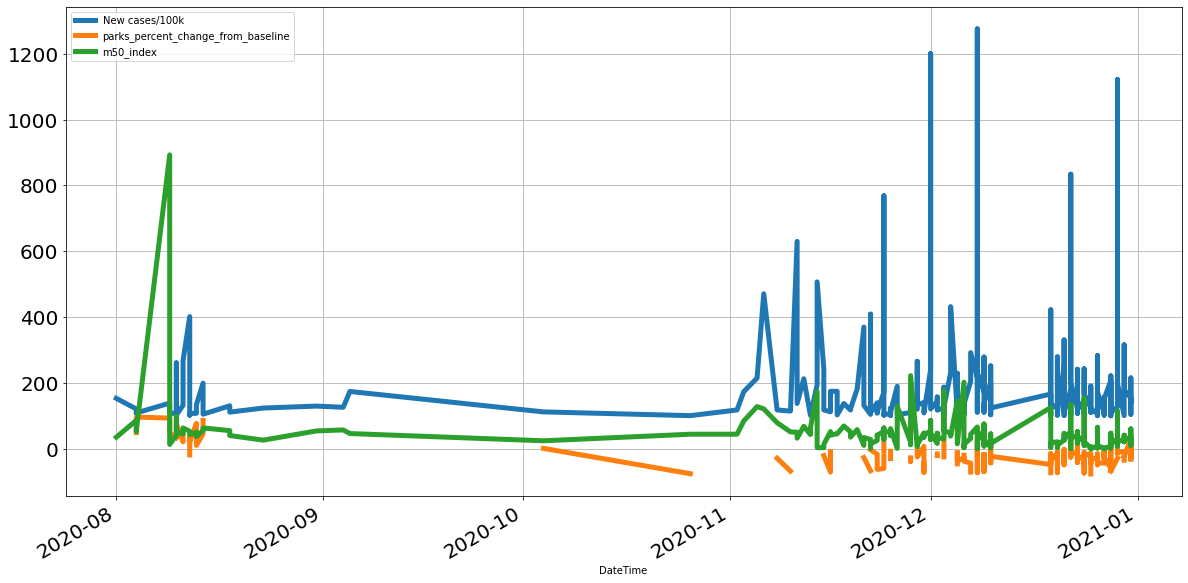

In [ ]:
df_high_cases_secondwave[['New cases/100k','parks_percent_change_from_baseline','m50_index']].plot(figsize=(20,10), linewidth=5, fontsize=20, grid=True)

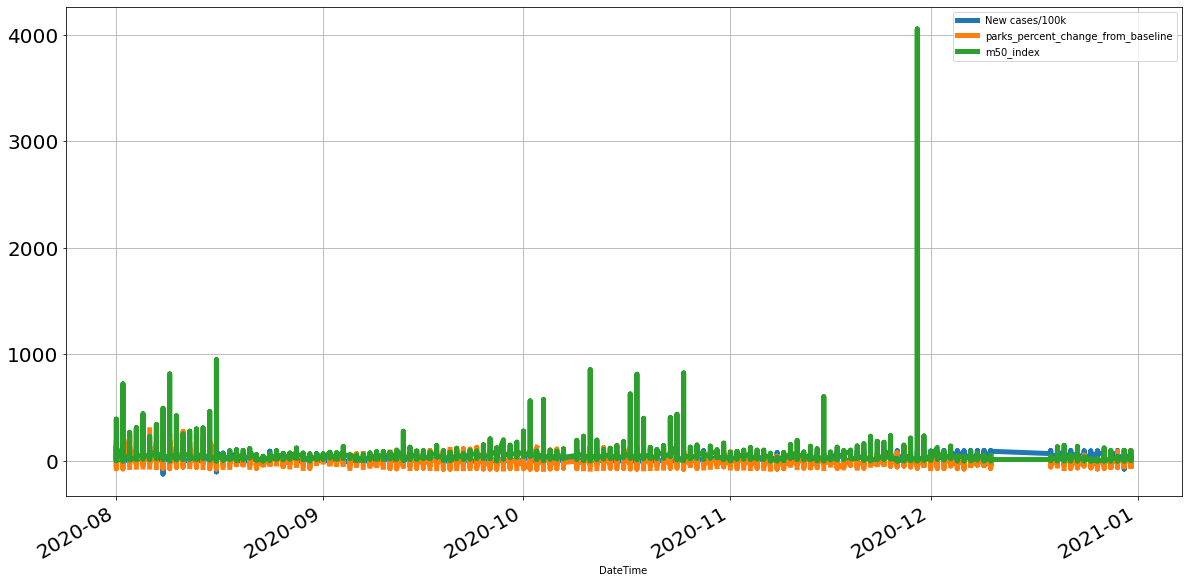

In [ ]:
df_low_cases_secondwave[['New cases/100k','parks_percent_change_from_baseline','m50_index']].plot(figsize=(20,10), linewidth=5, fontsize=20, grid=True)

# Summary

**Note:**

After filtering the COVID cases for high and low values, 

* the 'PopDensity' has a mean of 

  * 312.42 for low cases 
  * 121.880969 for high cases
* 'parks_percent_change_from_baseline' has a mean of 
  * 4.962744 for low cases
  * -20.568075 for high cases
* 'm50_index' has a mean of
  * 45.022588 for low cases
  * 37.361022	for high cases
* 'Area occupied/ 100k population' has a mean of 
  * 7830.239280 for low cases
  * 12051.223144 for high cases

## Plotting mobility in high cases county

### During high cases time

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


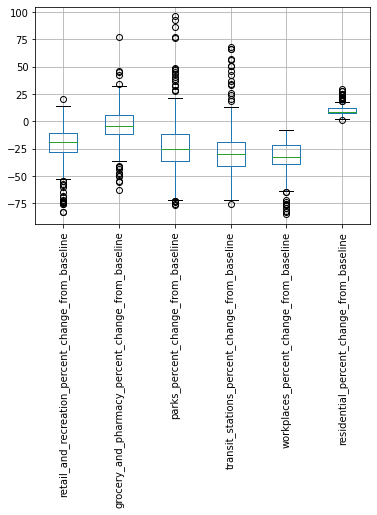

In [ ]:
boxplot_mobility = df_high_cases_secondwave.boxplot(column=['retail_and_recreation_percent_change_from_baseline', 
                                                    'grocery_and_pharmacy_percent_change_from_baseline',
                                           'parks_percent_change_from_baseline',
                                           'transit_stations_percent_change_from_baseline',
                                           'workplaces_percent_change_from_baseline',
                                           'residential_percent_change_from_baseline'],rot=90, fontsize=10)


### During low cases time

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


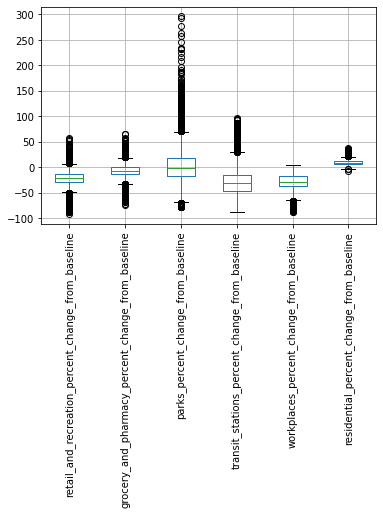

In [ ]:
boxplot_mobility = df_low_cases_secondwave.boxplot(column=['retail_and_recreation_percent_change_from_baseline', 
                                                    'grocery_and_pharmacy_percent_change_from_baseline',
                                           'parks_percent_change_from_baseline',
                                           'transit_stations_percent_change_from_baseline',
                                           'workplaces_percent_change_from_baseline',
                                           'residential_percent_change_from_baseline'],rot=90, fontsize=10)


# Plotting social distancing

## During high cases time

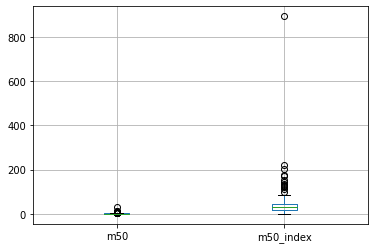

In [ ]:
boxplot = df_high_cases_secondwave.boxplot(column=['m50', 'm50_index'],rot=0, fontsize=10) 




## During low cases time

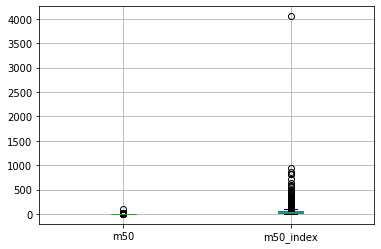

In [ ]:
boxplot = df_low_cases_secondwave.boxplot(column=['m50', 'm50_index'],rot=0, fontsize=10) 


# Mask rule severity

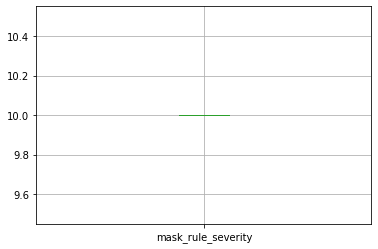

In [ ]:
boxplot = df_high_cases_secondwave.boxplot(column=['mask_rule_severity'],rot=0, fontsize=10)


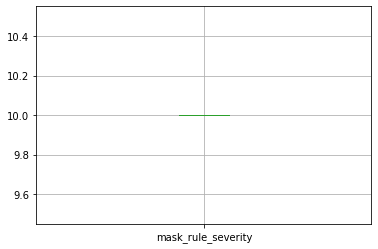

In [ ]:
boxplot = df_low_cases_secondwave.boxplot(column=['mask_rule_severity'],rot=0, fontsize=10)


# Population density

## During high cases time

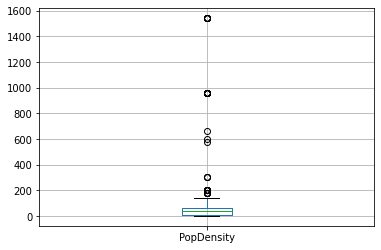

In [ ]:

boxplot = df_high_cases_secondwave.boxplot(column=['PopDensity'],rot=0, fontsize=10)


## During low cases time

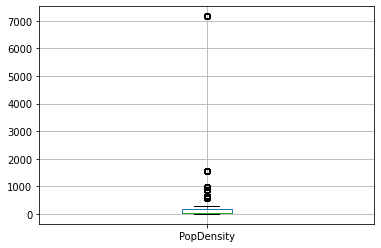

In [ ]:
boxplot = df_low_cases_secondwave.boxplot(column=['PopDensity'],rot=0, fontsize=10)


# Investigating 'Mendocino County'

In [ ]:
Mendocino_County_data = CA_combined_data[CA_combined_data['County Name'] == 'Mendocino County']
Mendocino_County_data

,Date,Province_State,FIPS,New cases,County Name,population,mask_rule_severity,m50,m50_index,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,PopDensity,New cases/100k,Area occupied/100k
6062,2020-03-01,California,6045,0,Mendocino County,86749,0.0,1.881,58,25.0,-1.0,31.0,NaN,2.0,-1.0,9.626461,0.000000,10388.033514
6063,2020-03-02,California,6045,0,Mendocino County,86749,0.0,3.212,100,12.0,2.0,4.0,NaN,4.0,-1.0,9.626461,0.000000,10388.033514
6064,2020-03-03,California,6045,0,Mendocino County,86749,0.0,3.021,94,14.0,7.0,22.0,NaN,3.0,-2.0,9.626461,0.000000,10388.033514
6065,2020-03-04,California,6045,0,Mendocino County,86749,0.0,2.650,82,12.0,4.0,17.0,NaN,2.0,-2.0,9.626461,0.000000,10388.033514
6066,2020-03-05,California,6045,0,Mendocino County,86749,0.0,3.419,106,9.0,4.0,14.0,NaN,2.0,-1.0,9.626461,0.000000,10388.033514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6355,2021-01-01,California,6045,0,Mendocino County,86749,10.0,0.054,1,-45.0,-30.0,24.0,NaN,-67.0,21.0,9.626461,0.000000,10388.033514
6356,2021-01-02,California,6045,71,Mendocino County,86749,10.0,0.115,3,-20.0,-7.0,-3.0,-39.0,-23.0,9.0,9.626461,81.845324,10388.033514
6357,2021-01-03,California,6045,53,Mendocino County,86749,10.0,0.068,2,-20.0,-12.0,2.0,-39.0,-15.0,7.0,9.626461,61.095805,10388.033514
6358,2021-01-04,California,6045,15,Mendocino County,86749,10.0,0.120,3,-19.0,-8.0,-16.0,-42.0,-29.0,12.0,9.626461,17.291266,10388.033514


In [ ]:
Mendocino_County_data['DateTime'] = pd.to_datetime(Mendocino_County_data['Date'],format='%Y-%m-%d')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


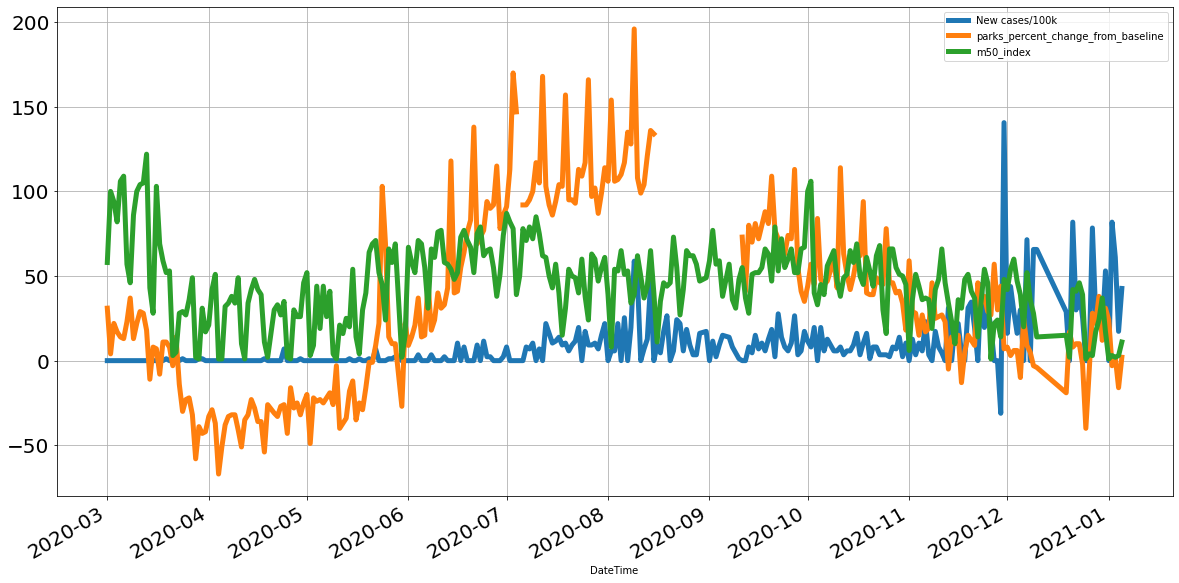

In [ ]:
#Mendocino_County_data.set_index('DateTime',inplace=True)
Mendocino_County_data[['New cases/100k','parks_percent_change_from_baseline','m50_index']].plot(figsize=(20,10), linewidth=5, fontsize=20, grid=True)

# Investigating 'Glenn County'

In [ ]:
Glenn_County_data = CA_combined_data[CA_combined_data['County Name'] == 'Glenn County']
Glenn_County_data

,Date,Province_State,FIPS,New cases,County Name,population,mask_rule_severity,m50,m50_index,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,PopDensity,New cases/100k
2618,2020-03-01,California,6021,0,Glenn County,28393,0.0,2.602,18,21.0,4.0,NaN,17.0,5.0,NaN,8.197381,0.000000
2619,2020-03-02,California,6021,0,Glenn County,28393,0.0,11.866,82,14.0,10.0,NaN,15.0,4.0,-1.0,8.197381,0.000000
2620,2020-03-03,California,6021,0,Glenn County,28393,0.0,11.846,82,19.0,17.0,NaN,14.0,3.0,-3.0,8.197381,0.000000
2621,2020-03-04,California,6021,0,Glenn County,28393,0.0,14.342,100,17.0,17.0,NaN,3.0,4.0,-1.0,8.197381,0.000000
2622,2020-03-05,California,6021,0,Glenn County,28393,0.0,15.664,109,15.0,13.0,NaN,8.0,5.0,-2.0,8.197381,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2888,2021-01-01,California,6021,26,Glenn County,28393,10.0,0.671,4,-37.0,-19.0,NaN,-6.0,-71.0,23.0,8.197381,91.571866
2889,2021-01-02,California,6021,36,Glenn County,28393,10.0,1.013,7,-22.0,-1.0,-37.0,16.0,-17.0,NaN,8.197381,126.791815
2890,2021-01-03,California,6021,26,Glenn County,28393,10.0,0.270,1,-4.0,0.0,NaN,26.0,-17.0,NaN,8.197381,91.571866
2891,2021-01-04,California,6021,35,Glenn County,28393,10.0,2.706,18,-18.0,13.0,NaN,17.0,-28.0,10.0,8.197381,123.269820


In [ ]:
Glenn_County_data['DateTime'] = pd.to_datetime(Glenn_County_data['Date'],format='%Y-%m-%d')
Glenn_County_data.set_index('DateTime',inplace=True)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
Glenn_County_data.dtypes

Date                                                   object
Province_State                                         object
FIPS                                                    int64
New cases                                               int64
County Name                                            object
population                                              int64
mask_rule_severity                                    float64
m50                                                   float64
m50_index                                               int64
retail_and_recreation_percent_change_from_baseline    float64
grocery_and_pharmacy_percent_change_from_baseline     float64
parks_percent_change_from_baseline                    float64
transit_stations_percent_change_from_baseline         float64
workplaces_percent_change_from_baseline               float64
residential_percent_change_from_baseline              float64
PopDensity                                            float64
dtype: o

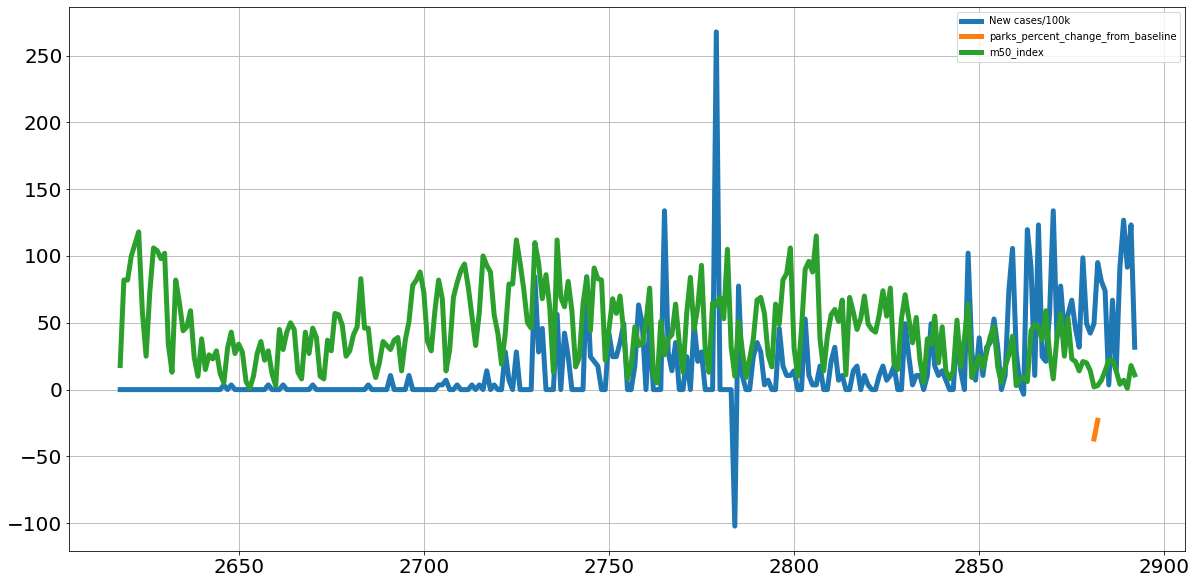

In [ ]:
Glenn_County_data[['New cases/100k','parks_percent_change_from_baseline','m50_index']].plot(figsize=(20,10), linewidth=5, fontsize=20, grid=True)

In [ ]:
Tehama_County_data = CA_combined_data[CA_combined_data['County Name'] == 'Tehama County']
Tehama_County_data

,Date,Province_State,FIPS,New cases,County Name,population,mask_rule_severity,m50,m50_index,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,PopDensity,New cases/100k
14031,2020-03-01,California,6103,0,Tehama County,65084,0.0,3.224,50,14.0,12.0,NaN,9.0,-1.0,NaN,8.296819,0.000000
14032,2020-03-02,California,6103,0,Tehama County,65084,0.0,6.372,100,14.0,14.0,NaN,3.0,1.0,-1.0,8.296819,0.000000
14033,2020-03-03,California,6103,0,Tehama County,65084,0.0,5.546,87,15.0,26.0,NaN,7.0,1.0,-2.0,8.296819,0.000000
14034,2020-03-04,California,6103,0,Tehama County,65084,0.0,5.915,92,12.0,13.0,NaN,4.0,1.0,-1.0,8.296819,0.000000
14035,2020-03-05,California,6103,0,Tehama County,65084,0.0,6.868,107,11.0,12.0,NaN,3.0,0.0,-1.0,8.296819,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14323,2021-01-01,California,6103,39,Tehama County,65084,10.0,1.110,17,-33.0,-26.0,-1.0,-20.0,-67.0,20.0,8.296819,59.922562
14324,2021-01-02,California,6103,52,Tehama County,65084,10.0,0.915,14,-16.0,-4.0,-18.0,-14.0,-15.0,7.0,8.296819,79.896749
14325,2021-01-03,California,6103,0,Tehama County,65084,10.0,0.827,12,-11.0,-4.0,0.0,17.0,-14.0,6.0,8.296819,0.000000
14326,2021-01-04,California,6103,0,Tehama County,65084,10.0,1.549,24,-9.0,-4.0,NaN,-2.0,-22.0,9.0,8.296819,0.000000


In [ ]:
Tehama_County_data['DateTime'] = pd.to_datetime(Tehama_County_data['Date'],format='%Y-%m-%d')
Tehama_County_data.set_index('DateTime',inplace=True)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


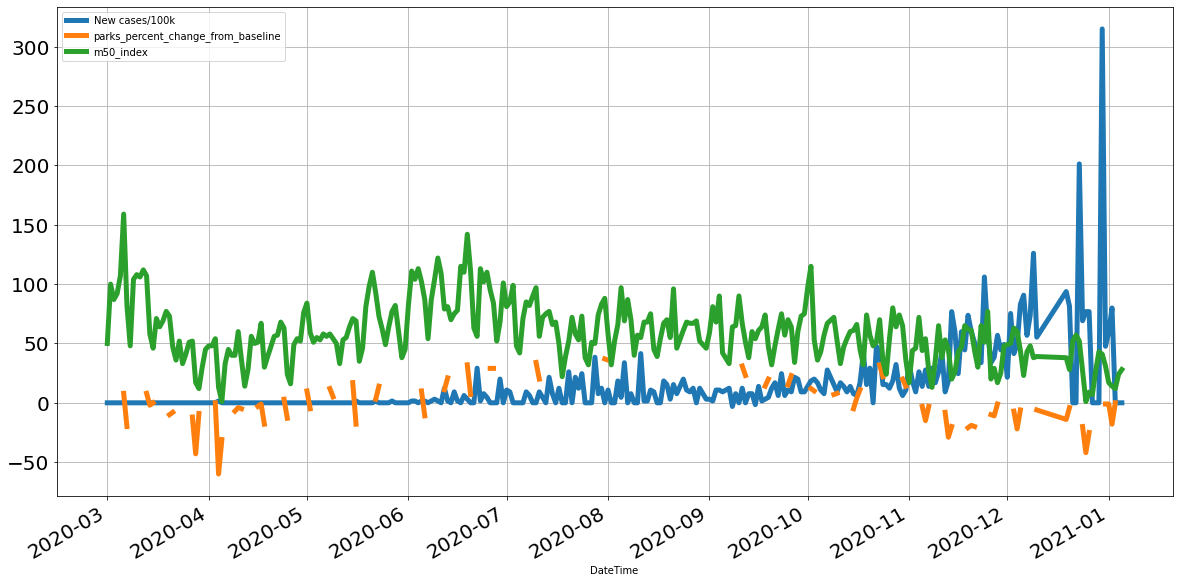

In [ ]:
Tehama_County_data[['New cases/100k','parks_percent_change_from_baseline','m50_index']].plot(figsize=(20,10), linewidth=5, fontsize=20, grid=True)